In [1]:
import requests
import os

from bs4 import BeautifulSoup

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service 

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
import re

# CSV 파일 이름은 앞서 저장한 파일명을 사용 (예: '배민_앱리뷰_5000개.csv')
csv_filename = '배민_앱리뷰_5000개.csv'

# CSV 파일 읽어오기
df_reviews = pd.read_csv(csv_filename)

# 리뷰 데이터 확인 (첫 5개 리뷰 출력)
print("리뷰 데이터 미리보기:")
print(df_reviews.head())

리뷰 데이터 미리보기:
                                                  리뷰  평점
0  찜목록 편집기능좀 넣어주세요 코로나기간에 찝한 200개 하나하나 들어가서 해제해야해...   1
1  사용 방법이 간편해 매우 만족스럽습니다. 다만, 쿠폰 목록을 편집할 수 있는 기능이...   5
2  일단 배민 클럽 혜택 받으라는 창 그만 좀 떴으면 합니다. 아무튼 간에 저는 언제 ...   3
3  식당별로 메모할 수 있는 기능 추가 부탁드립니다. 예를 들어 이집에서는 배달 시키기...   3
4  배민클럽 첫 구독 무료 혜택 받아서 가입했는데, 첫 주문하기 전에는 해지 예약을 할...   3


In [3]:
df_reviews['평점'] = df_reviews['평점'].astype(int)

In [4]:
label_list = [1 if i >= 4 else 0 for i in df_reviews['평점']]
df_reviews['label'] = label_list
df_reviews

,리뷰,평점,label
0,찜목록 편집기능좀 넣어주세요 코로나기간에 찝한 200개 하나하나 들어가서 해제해야해...,1,0
1,"사용 방법이 간편해 매우 만족스럽습니다. 다만, 쿠폰 목록을 편집할 수 있는 기능이...",5,1
2,일단 배민 클럽 혜택 받으라는 창 그만 좀 떴으면 합니다. 아무튼 간에 저는 언제 ...,3,0
3,식당별로 메모할 수 있는 기능 추가 부탁드립니다. 예를 들어 이집에서는 배달 시키기...,3,0
4,"배민클럽 첫 구독 무료 혜택 받아서 가입했는데, 첫 주문하기 전에는 해지 예약을 할...",3,0
...,...,...,...
4995,가장 많이 썼던 배달앱인데 포인트도 적게 쌓이고 배달팁도 요기요에 비해 너무 비싸서...,3,0
4996,첫주문 1만원 할인이라서 시켜볼려하는데 카드 등록도 하고 전화인증 모두 했음 근데 ...,1,0
4997,UI가 다른 사이트에 비해 보기 쉽고 깔끔해서 좋습니다.,5,1
4998,배민 좋아요 ㅋㅋ 주문하면 가까운데는 그래도 최대한 빨리 오시더라구요 전 좋더라구요...,5,1


In [5]:
print('배민 리뷰 평점평균 :', df_reviews['평점'].mean())

배민 리뷰 평점평균 : 2.2002


In [6]:
negative_reviews = df_reviews[df_reviews['평점'] <= 3]['리뷰']
print(negative_reviews)
print(len(negative_reviews))

0       찜목록 편집기능좀 넣어주세요 코로나기간에 찝한 200개 하나하나 들어가서 해제해야해...
2       일단 배민 클럽 혜택 받으라는 창 그만 좀 떴으면 합니다. 아무튼 간에 저는 언제 ...
3       식당별로 메모할 수 있는 기능 추가 부탁드립니다. 예를 들어 이집에서는 배달 시키기...
4       배민클럽 첫 구독 무료 혜택 받아서 가입했는데, 첫 주문하기 전에는 해지 예약을 할...
5       찜목록을 지역별로 폴더링해서 볼수있게 만들고, 최근 바뀐 ui가 너무 복잡해요. 기...
                              ...                        
4992    대체 이벤트성 정보열람 기간을 어떻게 apk올리자마자 이틀로 잡냐... 개발자가 스...
4993    제 명의가 아닌 아이디로도 많이 이용하고 편의성을 갖춘 앱이었지만 사용하지 않겠습니...
4995    가장 많이 썼던 배달앱인데 포인트도 적게 쌓이고 배달팁도 요기요에 비해 너무 비싸서...
4996    첫주문 1만원 할인이라서 시켜볼려하는데 카드 등록도 하고 전화인증 모두 했음 근데 ...
4999    제발 배달지역 아닌데도 뜨게 하지 마세요 4번 주문해서 4번 다 취소됐어요 1시간 ...
Name: 리뷰, Length: 3739, dtype: object
3739


In [7]:
!pip install konlpy scikit-learn

In [8]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 📌 1. 데이터 불러오기
# CSV 파일을 불러온다고 가정
reviewdata = pd.read_csv('배민민 앱 리뷰.csv')

# 평점이 3 이하인 리뷰를 부정 리뷰로 간주
negative_reviews = reviewdata[reviewdata['평점'] <= 3]['리뷰']

# 한국어 형태소 분석기 객체 생성
okt = Okt()

# 📌 2. 키워드 추출 함수
def extract_keywords(text):
    tokens = okt.pos(text, norm=True, stem=True)  # 형태소 분석 (정규화 + 어간추출)
    return [f'{word}/{tag}' for word, tag in tokens if tag in ['Noun', 'Adjective']]  # 명사(N), 형용사(VA)만 추출

# 📌 3. CountVectorizer 적용 (최대 3000개 키워드)
cv = CountVectorizer(max_features=3000, tokenizer=extract_keywords)
dtm = cv.fit_transform(negative_reviews)

# 📌 4. 가장 많이 등장하는 단어 확인
words = cv.get_feature_names_out()
word_counts = dtm.toarray().sum(axis=0)

# 📌 5. 데이터프레임으로 변환 후 정렬
keyword_freq = pd.DataFrame({'단어': words, '빈도': word_counts})
keyword_freq = keyword_freq.sort_values(by='빈도', ascending=False)

# 📌 6. 상위 20개 단어 출력
print(keyword_freq.head(20))

c:\Users\ensra\anaconda3\envs\SeSAC_baemin_env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                 단어    빈도
881         배달/Noun  1970
2246   있다/Adjective  1113
2454        주문/Noun   918
1815   없다/Adjective   811
885         배민/Noun   632
1585  아니다/Adjective   615
1           가게/Noun   594
63     같다/Adjective   570
1701         앱/Noun   554
1635  안되다/Adjective   506
112          것/Noun   487
2648        취소/Noun   414
2438   좋다/Adjective   402
143         고객/Noun   386
1108        사용/Noun   385
124         결제/Noun   376
1772        어플/Noun   371
2699        쿠폰/Noun   357
1437        시간/Noun   356
639         리뷰/Noun   350


In [9]:
!pip install seaborn wordcloud

C:\Users\ensra\AppData\Local\Temp\ipykernel_11480\2357202051.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['tokens'] = df_neg['리뷰'].apply(extract_nouns)
C:\Users\ensra\AppData\Local\Temp\ipykernel_11480\2357202051.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='Reds_r')


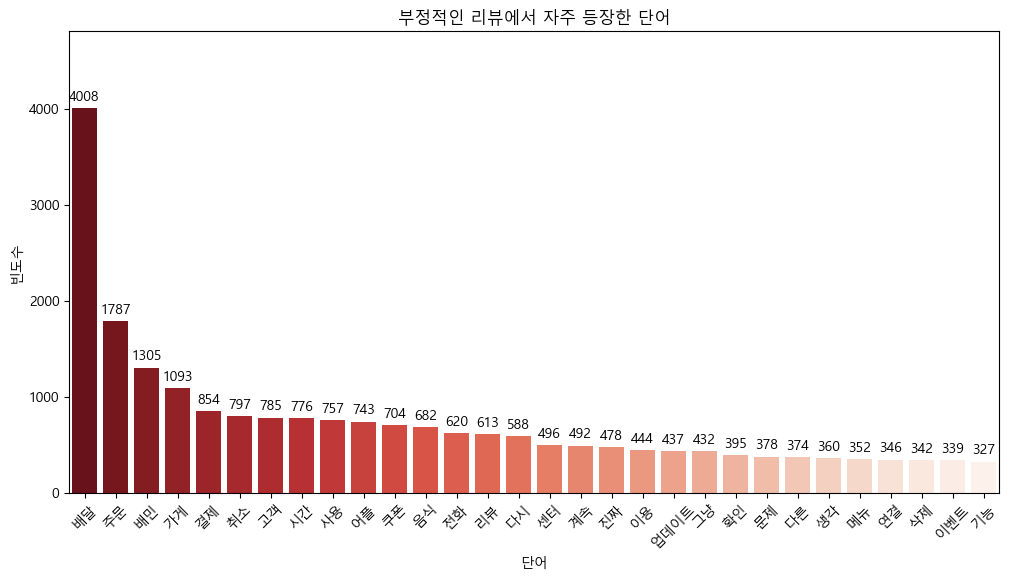

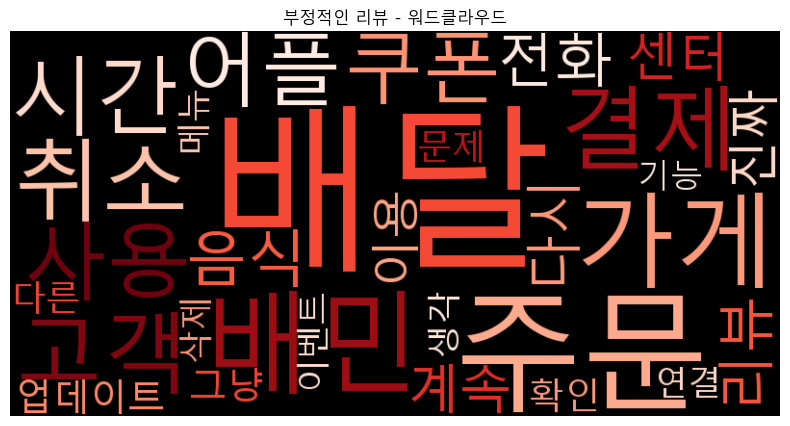

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud

# ✅ 1️⃣ CSV 파일 불러오기 (파일 경로에 맞게 수정하세요)
df = pd.read_csv('배민_앱리뷰_5000개.csv', encoding='utf-8-sig')

# ✅ 2️⃣ 부정적인 리뷰만 필터링 (평점 기준)
df_neg = df[df['평점'] <= 3]  # 1~2점 리뷰만 선택

# ✅ 3️⃣ 텍스트 데이터 전처리 및 토큰화
okt = Okt()
def extract_nouns(text):
    if isinstance(text, str):  # 문자열인지 확인
        return [word for word in okt.nouns(text) if len(word) > 1]  # 1글자 단어 제거
    return []

df_neg['tokens'] = df_neg['리뷰'].apply(extract_nouns)

# ✅ 4️⃣ 단어 빈도 계산
all_words = [word for tokens in df_neg['tokens'] for word in tokens]
word_counts = Counter(all_words)
common_words = word_counts.most_common(30)  # 상위 30개 단어 선택

# ✅ 5️⃣ 바차트 시각화 (수정됨)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='Reds_r')

# ⚡ 막대 위에 수치 표시 (숫자 크기 축소)
for i, word in enumerate(common_words):
    ax.text(i, word[1] + (max([w[1] for w in common_words]) * 0.02), str(word[1]), 
            ha='center', fontsize=10, color='black')  # 글씨 크기 줄이고 색상 변경

plt.xticks(rotation=45)
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.title("부정적인 리뷰에서 자주 등장한 단어")

# ⚡ ylim을 조정하여 천장과 간격 확보
plt.ylim(0, max([word[1] for word in common_words]) * 1.2)  # 막대와 천장 간격 넓힘
plt.show()

# ✅ 6️⃣ 워드클라우드 시각화
wordcloud = WordCloud(font_path='malgun.ttf', width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(dict(common_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("부정적인 리뷰 - 워드클라우드")
plt.show()

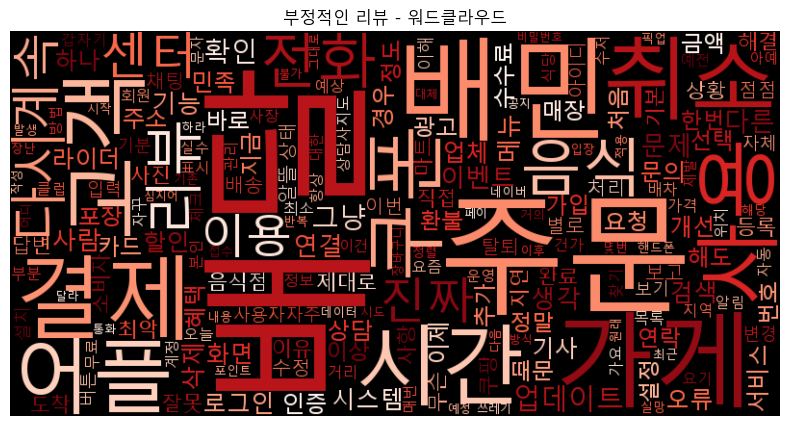

In [11]:
# 워드클라우드 시각화
wordcloud = WordCloud(font_path='malgun.ttf', width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("부정적인 리뷰 - 워드클라우드")
plt.show()

C:\Users\ensra\AppData\Local\Temp\ipykernel_11480\4153530703.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['tokens'] = df_neg['리뷰'].apply(extract_nouns)
C:\Users\ensra\AppData\Local\Temp\ipykernel_11480\4153530703.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[word[0] for word in common_words[1:]], y=[word[1] for word in common_words[1:]], palette='Reds_r')


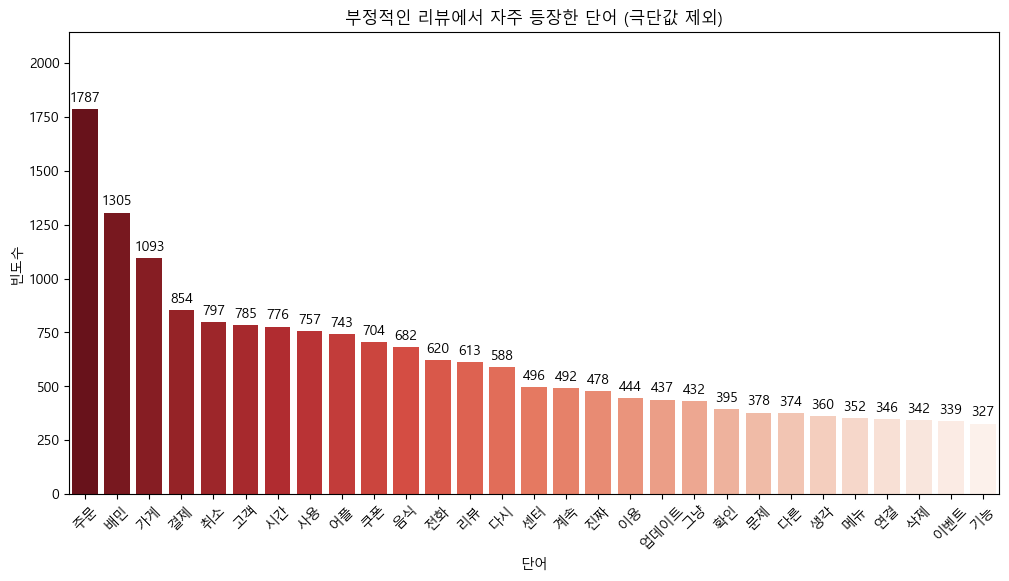

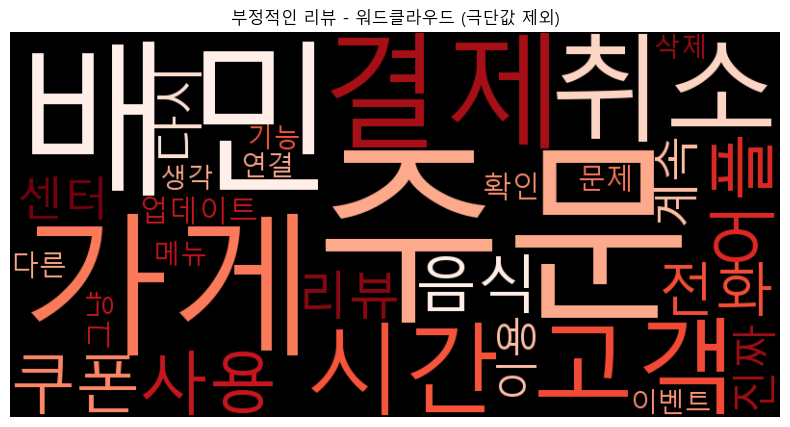

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud

# ✅ 1️⃣ CSV 파일 불러오기 (파일 경로에 맞게 수정하세요)
df = pd.read_csv('배민_앱리뷰_5000개.csv', encoding='utf-8-sig')

# ✅ 2️⃣ 부정적인 리뷰만 필터링 (평점 기준)
df_neg = df[df['평점'] <= 3]  # 1~2점 리뷰만 선택

# ✅ 3️⃣ 텍스트 데이터 전처리 및 토큰화
okt = Okt()
def extract_nouns(text):
    if isinstance(text, str):  # 문자열인지 확인
        return [word for word in okt.nouns(text) if len(word) > 1]  # 1글자 단어 제거
    return []

df_neg['tokens'] = df_neg['리뷰'].apply(extract_nouns)

# ✅ 4️⃣ 단어 빈도 계산
all_words = [word for tokens in df_neg['tokens'] for word in tokens]
word_counts = Counter(all_words)
common_words = word_counts.most_common(30)  # 상위 30개 단어 선택

# ✅ 5️⃣ 바차트 시각화 (극단값 제외한 나머지 단어)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=[word[0] for word in common_words[1:]], y=[word[1] for word in common_words[1:]], palette='Reds_r')

# ⚡ 막대 위에 수치 표시 (숫자 크기 축소)
for i, word in enumerate(common_words[1:]):
    ax.text(i, word[1] + (max([w[1] for w in common_words[1:]]) * 0.02), str(word[1]),
            ha='center', fontsize=10, color='black')  # 글씨 크기 줄이고 색상 변경

plt.xticks(rotation=45)
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.title("부정적인 리뷰에서 자주 등장한 단어 (극단값 제외)")

# ⚡ ylim을 조정하여 천장과 간격 확보
plt.ylim(0, max([word[1] for word in common_words[1:]]) * 1.2)  # 막대와 천장 간격 넓힘
plt.show()

# ✅ 6️⃣ 워드클라우드 시각화 (극단값 제외된 데이터 기반)
wordcloud = WordCloud(font_path='malgun.ttf', width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(dict(common_words[1:]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("부정적인 리뷰 - 워드클라우드 (극단값 제외)")
plt.show()